In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "camel"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Job executions per month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby(actions.month).agg({"jobhours":["sum","mean", "max", "count"]})

jobhours                           
                 sum      mean        max count
month                                          
2021-02  4402.676389  0.809911  20.484167  5436
2021-03  4241.184722  0.754525  18.681389  5621

## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                                    sum      mean        max
repo                                                        
camel-quarkus               2208.154167  3.242517  18.681389
camel-k                      935.046111  0.468225   6.586944
camel                        530.558611  0.658261   4.610278
camel-kafka-connector        313.001111  1.043337   7.451667
camel-spring-boot             87.921944  1.418096   2.842500
camel-karaf                   59.944722  0.644567   1.137222
camel-k-runtime               49.244722  0.033273   3.489444
camel-quarkus-examples        29.078056  0.538483   6.785833
camel-website                 15.396667  0.962292   1.235556
camel-kamelets                 8.310000  0.080680   0.132500
camel-examples                 3.936389  0.157456   0.281667
camel-spring-boot-examples     0.592222  0.148056   0.156389

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                                               sum      mean        max
repo                       workflowid                                  
camel-quarkus              1089736     1797.746944  9.770364  18.681389
camel                      545335       334.854722  0.672399   1.135556
camel-quarkus              1105458      276.200278  8.909686  15.520000
camel-k                    507167       245.288333  0.950730   4.303056
                           1072161      229.795833  0.890682   6.586944
                           568493       197.208611  0.764374   1.270000
camel-kafka-connector      2895599      195.222778  2.054977   7.451667
camel-k                    507168       175.549722  0.680425   5.999444
camel-quarkus              1187757      128.450278  4.143557  16.113889
camel                      2754040      102.774444  3.315305   4.610278
                           545830        92.240556  0.602879   1.061389
camel-spring-boot          2783264       61.582500  1.986532   2.842500
camel-kafka-connector      2813264       52.544167  1.694973   2.376944
camel-k-runtime            2238237       43.968611  2.931241   3.489444
camel-kafka-connector      2314639       37.305278  1.203396   6.004444
camel-k                    4348510       32.941944  0.128679   0.218611
camel-quarkus-examples     2804074       29.045556  1.075761   6.785833
camel-k                    507166        27.689444  0.107323   0.138056
camel-spring-boot          534416        26.339444  0.849659   1.795556
camel-karaf                2301559       23.464444  0.756918   1.022778
                           840598        23.029722  0.742894   1.137222
camel-kafka-connector      5369015       16.905556  0.545341   1.029722
camel-website              3222879       15.396667  0.962292   1.235556
camel-k                    507169        14.116389  0.051898   0.071111
camel-karaf                2775595       13.450556  0.433889   0.556389
camel-k                    7075443       10.558056  0.239956   0.287778
camel-kafka-connector      5933374        9.576389  0.308916   0.423889
camel-kamelets             5821444        8.310000  0.080680   0.132500
camel-quarkus              22092          3.619722  0.032907   0.040278
camel-examples             542154         3.279167  0.172588   0.281667
camel-k-runtime            56882          3.006111  0.250509   0.403333
camel-quarkus              2532957        1.799167  0.058038   0.091667
camel-k                    2411572        1.709167  0.055134   0.072500
camel-k-runtime            3154416        1.596667  0.001128   0.004167
camel-kafka-connector      2407438        1.318611  0.042536   0.080278
camel                      1577865        0.688889  0.005556   0.017500
camel-k-runtime            2411862        0.659722  0.021281   0.033889
camel-examples             549092         0.657222  0.109537   0.277500
camel-spring-boot-examples 1346231        0.450556  0.150185   0.156389
camel-quarkus              4845880        0.337778  0.001149   0.004444
camel-k                    1568294        0.142778  0.001956   0.003611
camel-spring-boot-examples 1974317        0.141667  0.141667   0.141667
camel-kafka-connector      1618918        0.128333  0.002567   0.005278
camel-k                    1482936        0.045833  0.001478   0.002222
camel-quarkus-examples     5094291        0.032500  0.001204   0.002222
camel-k-runtime            5476134        0.013611  0.002269   0.002500

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
550262,apache,camel-quarkus,558477334,1790,2021-02-11 16:51:45+00:00,2021-02-11 23:23:58+00:00,completed,failure,1089736,2021-02-11 16:52:03+00:00,2021-02-11 23:23:47+00:00,True,22,73743,camel,20.484167,2021-02
550308,apache,camel-quarkus,572368424,1831,2021-02-16 17:35:39+00:00,2021-02-17 00:03:33+00:00,completed,failure,1089736,2021-02-16 17:35:50+00:00,2021-02-17 00:03:23+00:00,True,22,71896,camel,19.971111,2021-02
550260,apache,camel-quarkus,558126592,1789,2021-02-11 14:42:46+00:00,2021-02-11 22:23:33+00:00,completed,failure,1089736,2021-02-11 15:50:58+00:00,2021-02-11 22:23:22+00:00,True,22,71792,camel,19.942222,2021-02
550266,apache,camel-quarkus,559127486,1794,2021-02-11 21:14:52+00:00,2021-02-12 03:47:13+00:00,completed,failure,1089736,2021-02-11 21:15:05+00:00,2021-02-12 03:47:01+00:00,True,22,70631,camel,19.619722,2021-02
550236,apache,camel-quarkus,554452234,1767,2021-02-10 11:30:38+00:00,2021-02-10 18:03:38+00:00,completed,failure,1089736,2021-02-10 11:30:50+00:00,2021-02-10 18:03:24+00:00,True,22,70499,camel,19.583056,2021-02
550172,apache,camel-quarkus,534951200,1709,2021-02-03 19:45:31+00:00,2021-02-04 02:26:41+00:00,completed,failure,1089736,2021-02-03 19:46:53+00:00,2021-02-04 02:26:31+00:00,True,22,70263,camel,19.517500,2021-02
550459,apache,camel-quarkus,657918264,1968,2021-03-16 14:39:29+00:00,2021-03-16 18:14:14+00:00,completed,cancelled,1089736,2021-03-16 14:42:04+00:00,2021-03-16 18:14:01+00:00,True,22,67253,camel,18.681389,2021-03
550554,apache,camel-quarkus,696920318,2052,2021-03-29 06:43:44+00:00,2021-03-29 10:40:29+00:00,completed,success,1089736,2021-03-29 06:43:55+00:00,2021-03-29 10:40:16+00:00,True,19,62428,camel,17.341111,2021-03
550553,apache,camel-quarkus,690483379,2051,2021-03-26 15:47:35+00:00,2021-03-26 18:37:17+00:00,completed,success,1089736,2021-03-26 15:47:56+00:00,2021-03-26 18:37:06+00:00,True,19,61389,camel,17.052500,2021-03
550582,apache,camel-quarkus,702690712,2078,2021-03-30 20:07:43+00:00,2021-03-30 23:23:53+00:00,completed,failure,1089736,2021-03-30 20:08:17+00:00,2021-03-30 23:23:42+00:00,True,19,61386,camel,17.051667,2021-03


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
1,apache,camel,build (1.8),1050.879722
7,apache,camel-k,build,909.920556
65,apache,camel-quarkus,Native Tests - database,444.943333
70,apache,camel-quarkus,Native Tests - misc,435.404167
76,apache,camel-quarkus,Native Tests - xml-json-olingo4,365.560833
63,apache,camel-quarkus,Native Tests - cloud,363.261111
69,apache,camel-quarkus,Native Tests - messaging-networking1,326.921944
62,apache,camel-quarkus,Native Tests - cache-networking3,320.784444
14,apache,camel-k,test,308.397222
67,apache,camel-quarkus,Native Tests - dozer-social-azure,306.108333


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
22,apache,camel-quarkus,success,7733
11,apache,camel-k-runtime,success,5426
7,apache,camel-k,success,5107
1,apache,camel,success,1655
14,apache,camel-kafka-connector,success,1135
21,apache,camel-quarkus,skipped,847
6,apache,camel-k,failure,677
19,apache,camel-quarkus,cancelled,648
20,apache,camel-quarkus,failure,531
0,apache,camel,failure,433


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

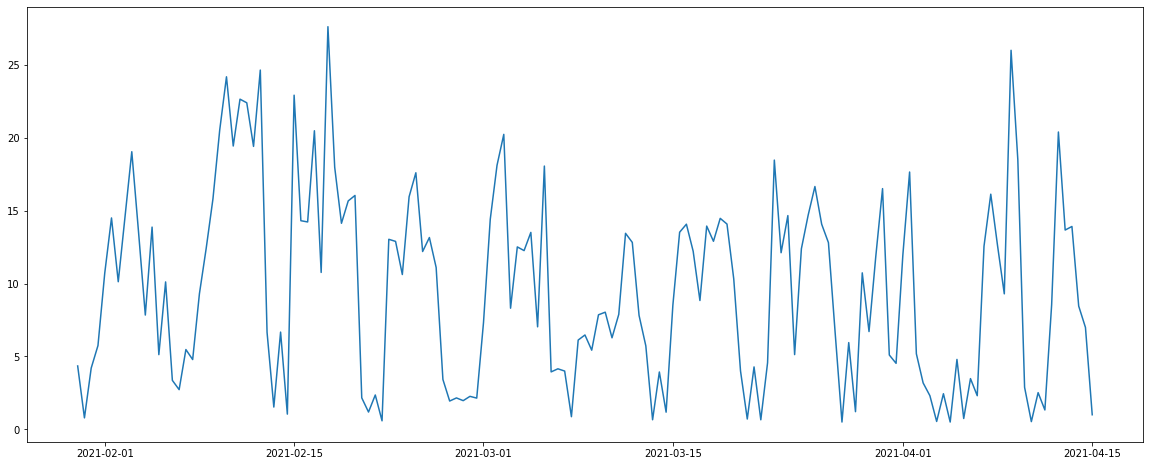

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

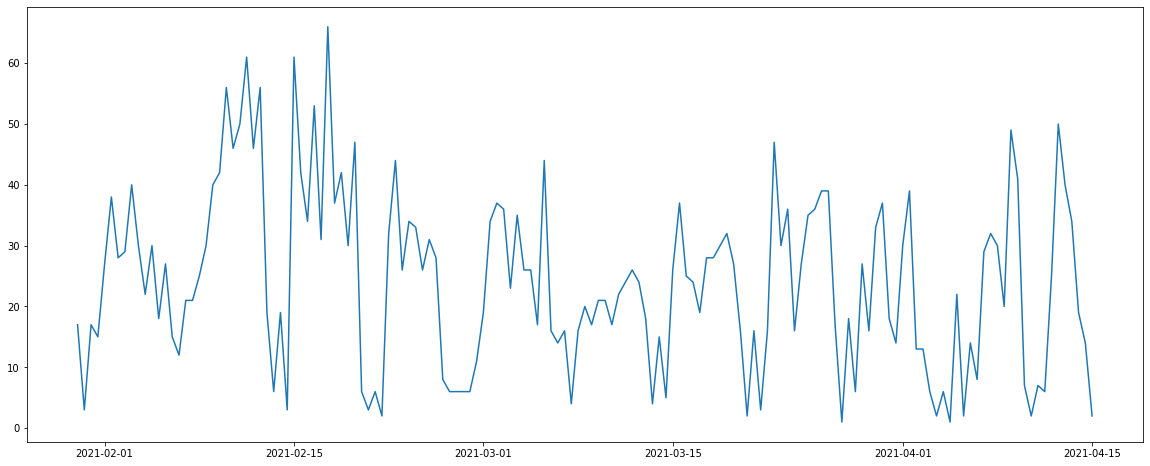

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()